In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#数据的加载
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_excel("./附件2 慢性病及相关因素流调数据.xlsx")
data
c_list = data.values.tolist()[0]  # 得到想要设置为列索引【表头】的某一行提取出来
data.columns = c_list  		    # 设置列索引【表头】
data.drop([0], inplace=True)

In [12]:
data.fillna(0,inplace=True)

In [13]:
#定义生活习惯，饮食习惯，人口统计因素的列
lifestyles = ["是否吸烟","开始吸烟年龄","平均每周吸烟天数","一天吸烟支数","是否饮酒","饮酒年数"
             ,"是否饮用高度白酒","是否饮用低度白酒","是否饮用啤酒",
              "是否饮用黄酒、糯米酒","是否饮用葡萄酒","不吃早餐","在家吃早餐","不吃中餐","不吃晚餐"]
foodstyles = ["是否吃大米","食用大米的频率","是否吃小麦面粉","食用小麦面粉的频率","是否吃杂粮","食用杂粮的频率"
             ,"是否吃薯类","食用薯类的频率","是否吃油炸面食","食用油炸面食的频率","是否吃猪肉","食用猪肉的频率","是否吃牛羊肉",
              "食用牛羊肉的频率","是否吃鲜奶","食用鲜奶的频率"]
target_col = "有没有被社区或以上医院的医生诊断过患有高血压"

In [14]:
x_train,x_test,y_trian,y_test =train_test_split(data[lifestyles+foodstyles],data[target_col],test_size = 0.2,random_state=0)

In [15]:
gbm = GradientBoostingClassifier(random_state=22)
gbm.fit(x_train,y_trian)

GradientBoostingClassifier(random_state=22)

In [17]:
y_pred = gbm.predict(x_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        42
           1       0.36      0.03      0.05       136
           2       0.91      1.00      0.95      1416

    accuracy                           0.91      1594
   macro avg       0.76      0.60      0.62      1594
weighted avg       0.86      0.91      0.87      1594



In [21]:
feature_importances = gbm.feature_importances_
feaure_name = x_train.columns

In [23]:
feature_importances_df = pd.DataFrame({
    "特征":feaure_name,
    "重要性":feature_importances
})

Text(0.5, 1.0, '特征重要性')

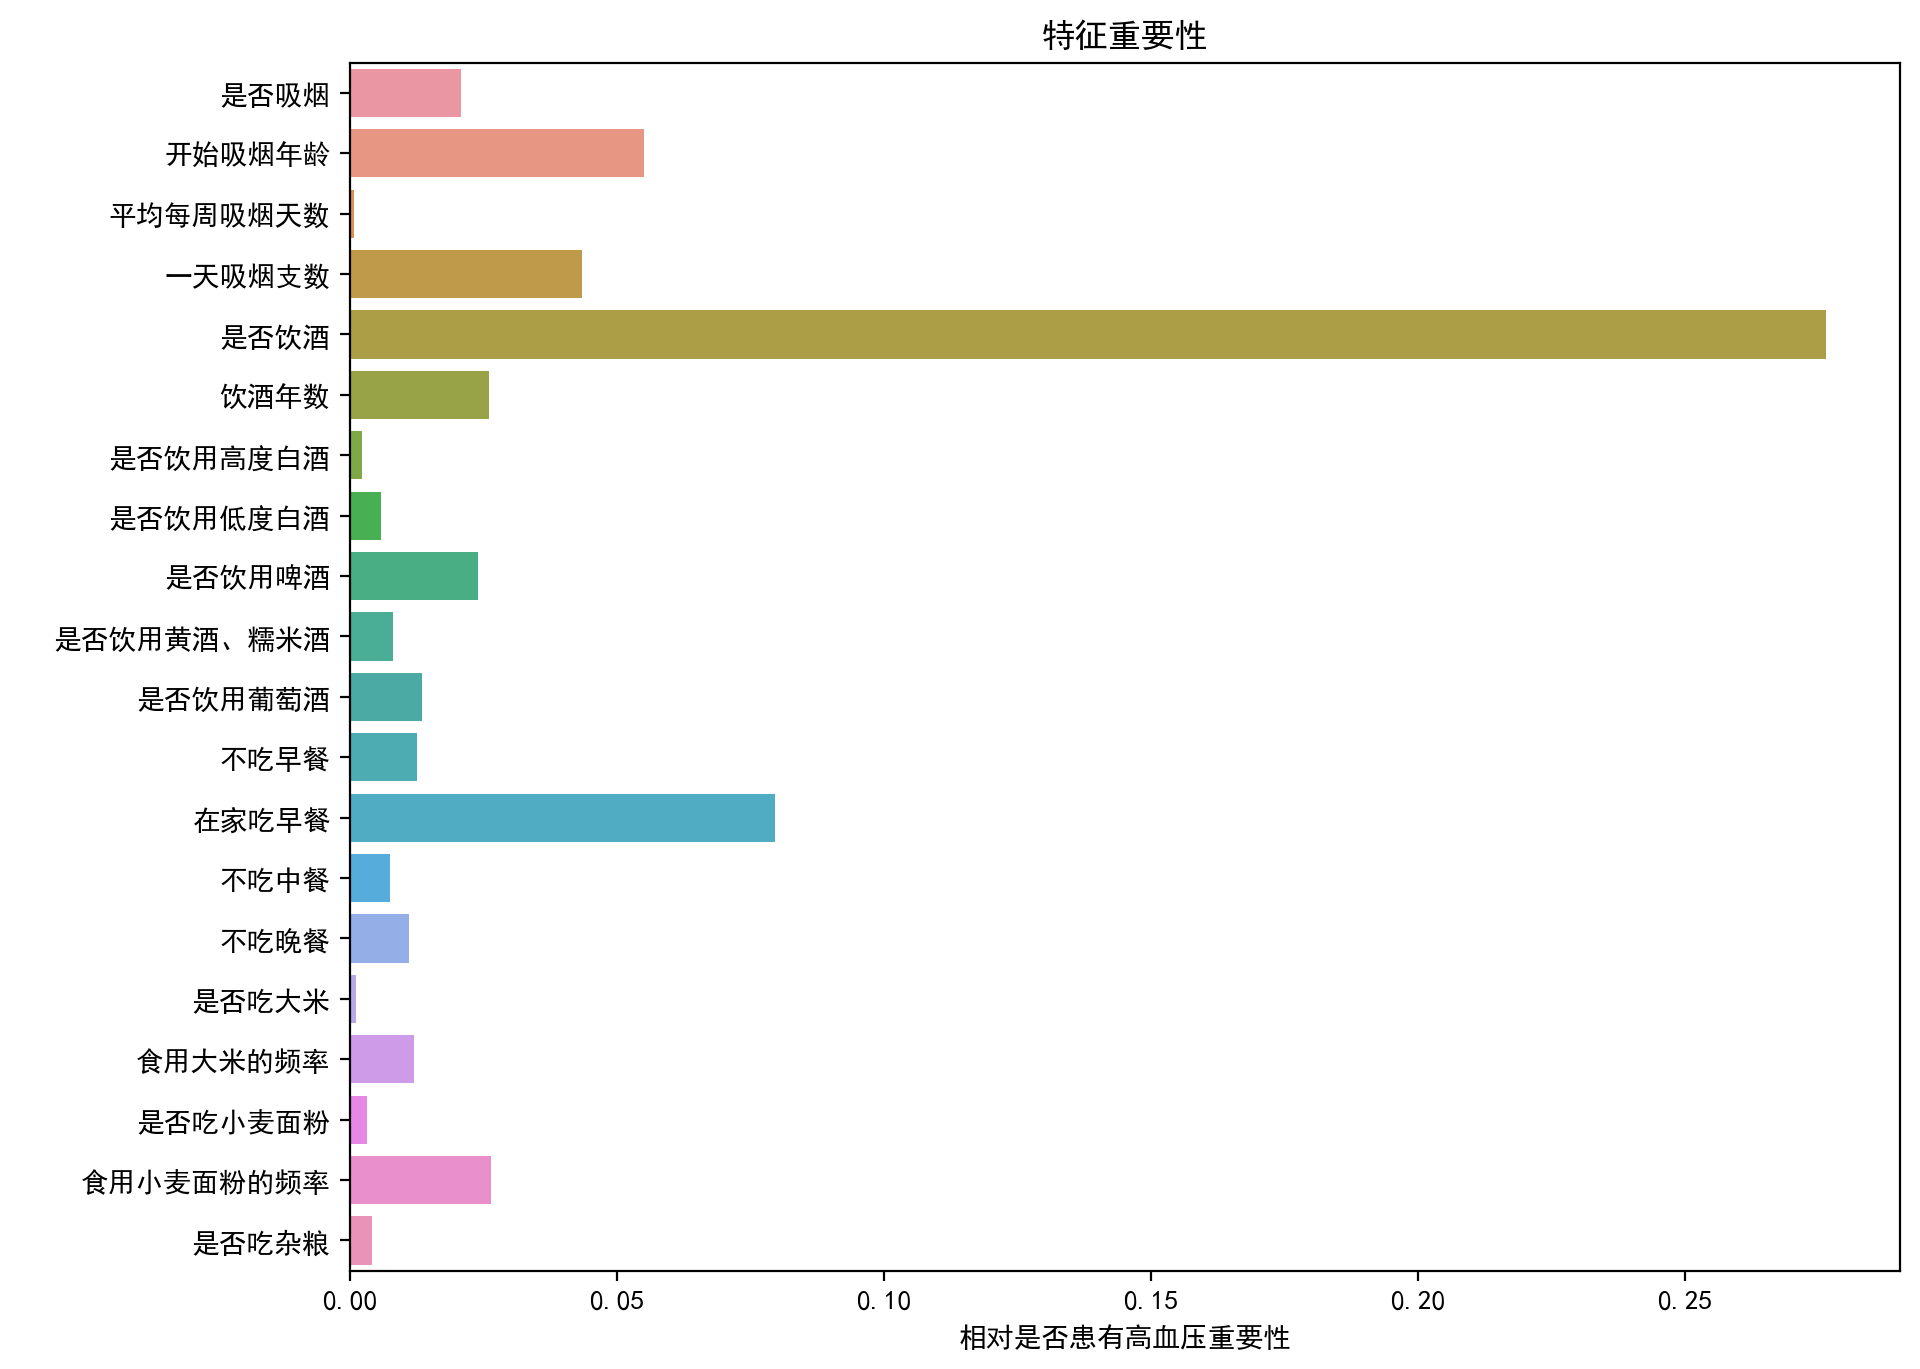

In [50]:
plt.figure(figsize = (10,8),dpi = 200)
sns.barplot(x="重要性",y="特征",data = feature_importances_df[:20],ci=None)
plt.xlabel("相对是否患有高血压重要性")
plt.ylabel(" ")
plt.title("特征重要性")

In [36]:
##接下来是分析是否患有糖尿病
#定义生活习惯，饮食习惯，人口统计因素的列
lifestyles = ["是否吸烟","开始吸烟年龄","平均每周吸烟天数","一天吸烟支数","是否饮酒","饮酒年数"
             ,"是否饮用高度白酒","是否饮用低度白酒","是否饮用啤酒",
              "是否饮用黄酒、糯米酒","是否饮用葡萄酒","不吃早餐","在家吃早餐","不吃中餐","不吃晚餐"]
foodstyles = ["是否吃大米","食用大米的频率","是否吃小麦面粉","食用小麦面粉的频率","是否吃杂粮","食用杂粮的频率"
             ,"是否吃薯类","食用薯类的频率","是否吃油炸面食","食用油炸面食的频率","是否吃猪肉","食用猪肉的频率","是否吃牛羊肉",
              "食用牛羊肉的频率","是否吃鲜奶","食用鲜奶的频率"]
target_col = "您有没有被社区或以上医院的医生诊断患有糖尿病"

In [37]:
x_train,x_test,y_trian,y_test =train_test_split(data[lifestyles+foodstyles],data[target_col],test_size = 0.2,random_state=5)

In [38]:
gbm = GradientBoostingClassifier(random_state=12)
gbm.fit(x_train,y_trian)

GradientBoostingClassifier(random_state=12)

In [39]:
y_pred = gbm.predict(x_test)
y_pred

array([2, 2, 0, ..., 2, 2, 2], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        36
           1       0.00      0.00      0.00        45
           2       0.96      1.00      0.98      1513

    accuracy                           0.96      1594
   macro avg       0.65      0.56      0.59      1594
weighted avg       0.94      0.96      0.95      1594



In [41]:
feature_importances_D = gbm.feature_importances_
feaure_name_D = x_train.columns

In [42]:
feature_importances_df_D = pd.DataFrame({
    "特征":feaure_name_D,
    "重要性":feature_importances_D
})

Text(0.5, 1.0, '特征重要性')

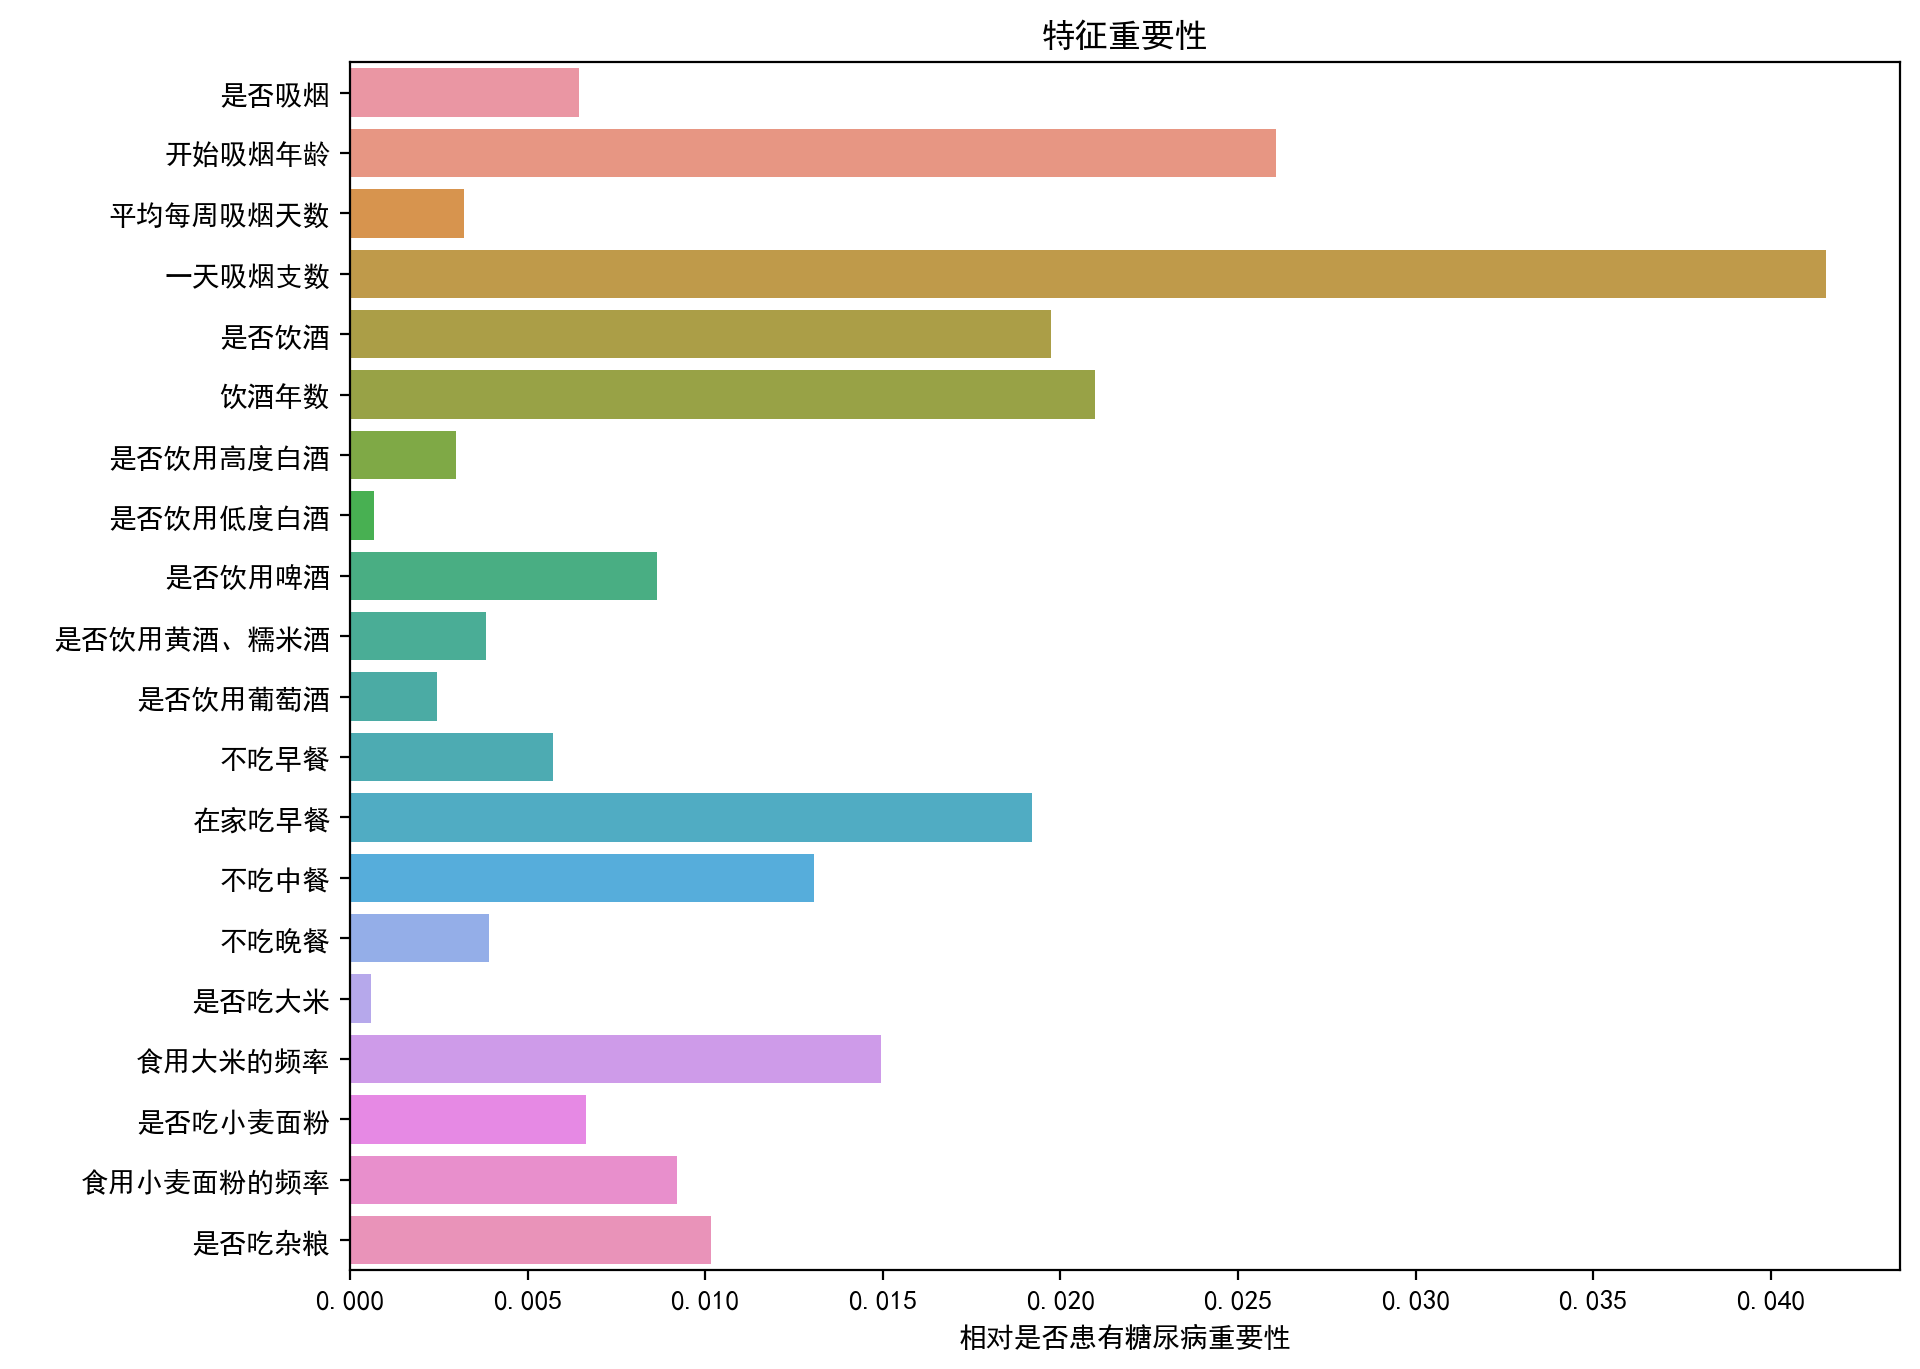

In [51]:
plt.figure(figsize = (10,8),dpi = 200)
sns.barplot(x="重要性",y="特征",data = feature_importances_df_D[:20],ci=None)
plt.ylabel(" ")
plt.xlabel("相对是否患有糖尿病重要性")
plt.title("特征重要性")